In [3]:
!pip install torch

You should consider upgrading via the 'C:\Users\vi120\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt 
from underthesea import word_tokenize
import nltk
from nltk.tokenize import word_tokenize as wt
from sklearn.model_selection import train_test_split

# read data

In [6]:
vi=pd.read_csv('./vi_sents/vi_sents.txt', delimiter='/t',header=None,names=['vietnamese'])
en=pd.read_csv('./en_sents/en_sents.txt',delimiter='/t',header=None,names=['english'])

C:\Users\vi120\AppData\Local\Temp\ipykernel_19000\3503274264.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  vi=pd.read_csv('./vi_sents/vi_sents.txt', delimiter='/t',header=None,names=['vietnamese'])
C:\Users\vi120\AppData\Local\Temp\ipykernel_19000\3503274264.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  en=pd.read_csv('./en_sents/en_sents.txt',delimiter='/t',header=None,names=['english'])


In [7]:
df=pd.concat([en,vi],axis=1)

In [8]:
df.shape

(254090, 2)

# eda

In [9]:
df.dropna()

,english,vietnamese
0,Please put the dustpan in the broom closet,xin vui lòng đặt người quét rác trong tủ chổi
1,Be quiet for a moment.,im lặng một lát
2,Read this,đọc này
3,Tom persuaded the store manager to give him ba...,tom thuyết phục người quản lý cửa hàng trả lại...
4,Friendship consists of mutual understanding,tình bạn bao gồm sự hiểu biết lẫn nhau
...,...,...
254085,What sound does a sheep make?,một con cừu tạo ra âm thanh gì?
254086,Tom stayed in Boston for three months.,Tom ở lại boston trong ba tháng.
254087,Tom borrowed $300 from Mary,tom đã vay $ 300 từ mary
254088,Why aren't you interested?,tại sao bạn không quan tâm?


In [11]:
df.head()

,english,vietnamese
0,Please put the dustpan in the broom closet,xin vui lòng đặt người quét rác trong tủ chổi
1,Be quiet for a moment.,im lặng một lát
2,Read this,đọc này
3,Tom persuaded the store manager to give him ba...,tom thuyết phục người quản lý cửa hàng trả lại...
4,Friendship consists of mutual understanding,tình bạn bao gồm sự hiểu biết lẫn nhau


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254090 entries, 0 to 254089
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   english     254090 non-null  object
 1   vietnamese  254090 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [13]:
df.head(1)

,english,vietnamese
0,Please put the dustpan in the broom closet,xin vui lòng đặt người quét rác trong tủ chổi


In [14]:
df=df.dropna()

In [15]:
df=df.drop_duplicates()

In [16]:
df.shape

(254080, 2)

In [17]:
df.describe()

,english,vietnamese
count,254080,254080
unique,254080,244007
top,Tom was standing just in front of a large buil...,điều đó thật tuyệt
freq,1,14


## find the top sentence in column vietnamese

In [18]:
df.query('vietnamese=="điều đó thật tuyệt"')

,english,vietnamese
13374,That's just awesome,điều đó thật tuyệt
14947,That's very nice.,điều đó thật tuyệt
45070,That wasn't nice.,điều đó thật tuyệt
56957,This is great,điều đó thật tuyệt
87441,That's real nice,điều đó thật tuyệt
91445,That would've been nice,điều đó thật tuyệt
145935,That was great.,điều đó thật tuyệt
171954,That's kind of nice,điều đó thật tuyệt
175117,That would be cool.,điều đó thật tuyệt
182073,That wasn't cool.,điều đó thật tuyệt


## find the sentens duplicate in column vietnamese

In [19]:
count = df['vietnamese'].value_counts()
duplicates = count[count > 1]
if not duplicates.empty:
    print(duplicates)

vietnamese
điều đó thật tuyệt              14
tôi rất vui được gặp bạn        11
bạn thật tuyệt vời              11
tôi không biết phải làm gì      10
bạn sẽ ổn thôi                  10
                                ..
Anh sợ chó.                      2
bạn đã sai                       2
im lặng một lát                  2
đó là những gì tôi muốn biết     2
điều này không giống bạn         2
Name: count, Length: 8192, dtype: int64


- Overall, the data is quite rich and diverse. The number of words in the "english" column, counted using count is 254,080, and unique shows a similar pattern. This indicates that the words in the English column are abundant, varied, and non-repetitive. Each sentence in the column appears only once. However, in the "vietnamese" column, the situation is different: the count is 254,080, while the unique value is 244,007. The most frequently occurring sentence repeats up to 14 times. Upon querying and analyzing the data, it was found that there are multiple ways to express a single sentence in English, demonstrated through the use of synonyms like "awesome," "nice," and "great."

## convert to lower

In [20]:
def lower(x):
    return x.lower()

In [21]:
df['english']=df['english'].apply(lambda x: lower(str(x)))
df['vietnamese']=df['vietnamese'].apply(lambda x: lower(str(x)))
df.head(1)

,english,vietnamese
0,please put the dustpan in the broom closet,xin vui lòng đặt người quét rác trong tủ chổi


## remove speactial character

In [22]:
# remove spectical character
def remove_eng(x):
    x=x.lower()
    reg=r"[a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ,\.?!:;']+"
    y=re.findall(reg,x)
    x=' '.join(y)
    return x

In [23]:
a="hello, i'm VienVien. Nice to meet you! @#$ ..."
remove_eng(a)

"hello, i'm vienvien. nice to meet you! ..."

In [24]:
# remove spectical character
def remove_vi(x):
    x=x.lower()
    reg = r"[a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ,!.;:]+|\.\.\.|\\"
    y=re.findall(reg,x)
    x=' '.join(y)
    return x

## Remove rows containing words with accents in the "english" column.

In [25]:
def remove_vn_in_en(df):
    re = r'[àáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ]'
    df['pos'] = df['english'].str.contains(re, na=False)
    df_cleaned = df.query('pos == False')[['english', 'vietnamese']]
    # print(df_cleaned)
    # df_cleaned = df_cleaned.drop(columns=['pos'])
    return df_cleaned
df = remove_vn_in_en(df)
df.head(1)

,english,vietnamese
0,please put the dustpan in the broom closet,xin vui lòng đặt người quét rác trong tủ chổi


## remove extra space

In [26]:
# def remove_extra_space(x):


## stastic senten 

In [27]:
# def length_a(text):
#     return len(text.split())

In [28]:
# len_eng = df['english'].apply(lambda x: length_a(x)).tolist()

In [29]:
# len_vi=df['vietnamese'].apply(lambda x: length_a(x)).to_list()

In [30]:
df['len_en'] = df['english'].apply(lambda x: len(x.split()))
df['len_vi'] = df['vietnamese'].apply(lambda x: len(x.split()))

In [31]:
df['len_en'].describe()

count    254050.000000
mean          6.773513
std           2.702295
min           1.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          47.000000
Name: len_en, dtype: float64

In [32]:
df['len_en'].max()

np.int64(47)

In [33]:
df.query(f'len_en == {df["len_en"].max()}')

,english,vietnamese,len_en,len_vi
71517,"if you want to sound like a native speaker, yo...","nếu bạn muốn nghe giống như người bản ngữ, bạn...",47,49


In [34]:
df.query(f'len_en == {df["len_en"].min()}')

,english,vietnamese,len_en,len_vi
2923,hi.,chào.,1,1
21201,jump!,nhảy đi,1,2
38017,go.,đi.,1,1
39773,fire!,ngọn lửa!,1,2
41257,who?,ai?,1,1
43171,perfect!,hoàn hảo!,1,2
47057,seriously?,nghiêm túc?,1,2
68938,listen.,nghe.,1,1
70848,terrific!,khủng khiếp!,1,2
122102,wonderful!,tuyệt vời!,1,2


In [35]:
a=df['len_en'].value_counts().sort_index() #values and count, 2 xh 2996 lan
b=df['len_vi'].value_counts().sort_index()
a

len_en
1        25
2      2996
3     16034
4     30102
5     40317
6     42538
7     37860
8     28614
9     20067
10    12900
11     8511
12     5319
13     3348
14     2194
15     1315
16      829
17      319
18      236
19      154
20       97
21       53
22       63
23       40
24       32
25       21
26       11
27       12
28        7
29        4
30        9
31        4
32        5
33        1
34        3
35        2
36        1
37        1
38        1
39        1
43        1
44        2
47        1
Name: count, dtype: int64

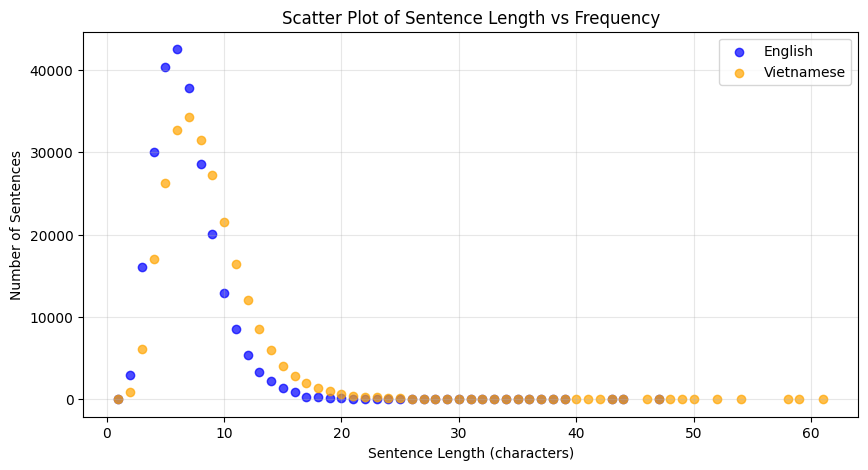

In [36]:
plt.figure(figsize=(10, 5))
plt.scatter(a.index,a.values, alpha=0.7,label='English', color='blue')
plt.scatter(b.index,b.values, alpha=0.7,label='Vietnamese', color='orange')
plt.title('Scatter Plot of Sentence Length vs Frequency')
plt.xlabel('Sentence Length (characters)')
plt.ylabel('Number of Sentences')
plt.legend()
plt.grid(alpha=0.3)

In [38]:
# df['vietnamese']=df['vietnamese'].apply(lambda x: word_tokenize(x))

In [39]:
# df.head(6)

In [40]:
# !python -m spacy download en_core_web_sm


In [41]:
# import spacy
# nlp = spacy.load("en_core_web_sm")
# doc = nlp("This is a sentence.")


In [42]:
# print([token.text for token in doc])

In [43]:
# df['t'] = df['english'].apply(lambda x: [token.text for token in nlp(x)])